# Advanced Methods in Data Analysis

# Ejercicio 5 - Grupo 8



## Integrantes
Laura Gutierrez   Código 201015209

Fernando Bautista Código 202027865

Fredi Baron       Código 202027522

Ingrid Hernández  Código 202028041

In [1]:
import pandas as pd
%matplotlib inline

sales = pd.read_csv('example_retail_sales.csv')
df = pd.DataFrame(sales)
df['ds'] = pd.to_datetime(df['ds'])

In [2]:
df.dtypes
# df.head()

ds    datetime64[ns]
y              int64
dtype: object

<AxesSubplot:>

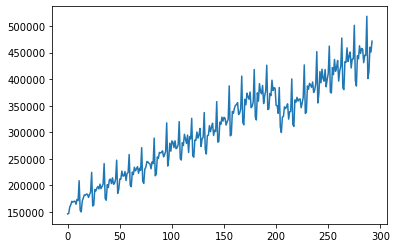

In [3]:
df['y'].plot()

<AxesSubplot:>

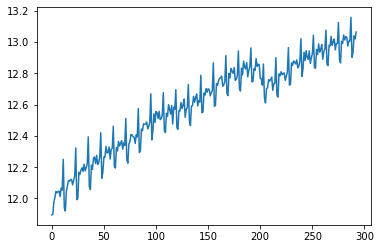

In [4]:
import numpy as np
df['y'] = np.log(df['y'])
df['y'].plot()

To install Prophet in Anaconda:
    
On Prompt install Ephem:
conda install -c anaconda ephem

Install Pystan:
conda install -c conda-forge pystan

Finally install Fbprophet
conda install -c conda-forge fbprophet

In [5]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

m = Prophet()
m.fit(df)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future = m.make_future_dataframe(periods=6, freq='M')
future.tail()

,ds
294,2016-06-30
295,2016-07-31
296,2016-08-31
297,2016-09-30
298,2016-10-31


In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
294,2016-06-30,13.057700,13.037886,13.079061
295,2016-07-31,13.082357,13.062548,13.103237
296,2016-08-31,13.015546,12.994063,13.034507
297,2016-09-30,13.037862,13.017852,13.061603
298,2016-10-31,13.055691,13.034706,13.076949


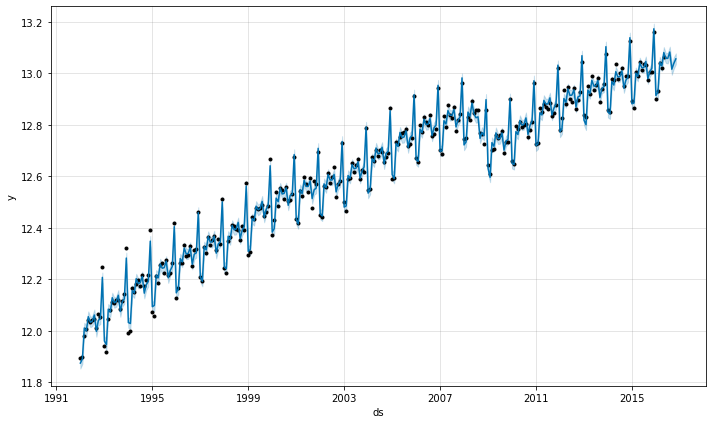

In [8]:
fig1 = m.plot(forecast)

In [9]:
sales = pd.read_csv('example_retail_sales.csv')
df2 = pd.DataFrame(sales)
df2['ds'] = pd.to_datetime(df2['ds'])
df2.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


In [10]:
n = Prophet()
n.fit(df2)
future2 = n.make_future_dataframe(periods=6, freq='M')
forecast2 = n.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
294,2016-06-30,470389.489767,459641.694499,480766.043306
295,2016-07-31,477462.506058,467113.118205,487410.696933
296,2016-08-31,454508.224157,443621.423292,464674.309016
297,2016-09-30,462881.112019,452668.388129,473265.087642
298,2016-10-31,468472.871196,458094.022200,479166.680416


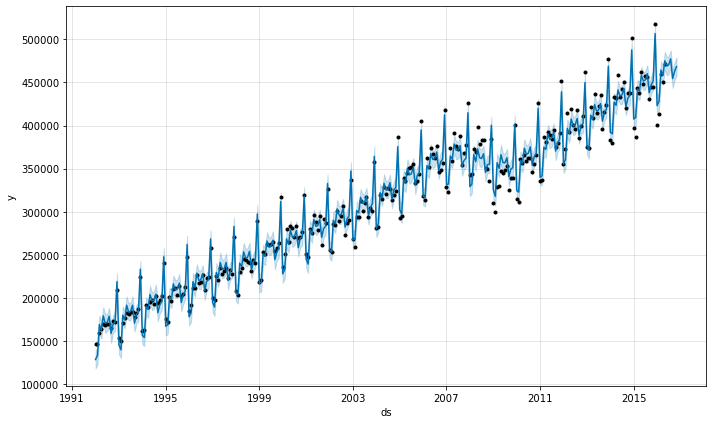

In [11]:
fig2 = n.plot(forecast2)

SyntaxError: invalid syntax (<ipython-input-12-ccecb6933434>, line 1)